In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st
import re

<div class="alert alert-block alert-info">
<b> Описание проекта:</b><br><br>
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br><br>
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<br><br>
<b>Описание данных:</b><br><br>
<b>Name</b> — название игры<br>
<b>Platform</b> — платформа<br>
<b>Year_of_Release</b> — год выпуска<br>
<b>Genre</b> — жанр игры<br>
<b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)<br>
<b>EU_sales</b> — продажи в Европе (миллионы долларов)<br>
<b>JP_sales</b> — продажи в Японии (миллионы долларов)<br>
<b>Other_sales</b> — продажи в других странах (миллионы долларов)<br>
<b>Critic_Score</b> — оценка критиков (максимум 100)<br>
<b>User_Score</b> — оценка пользователей (максимум 10)<br>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>
    <i>* Данные за 2016 год могут быть неполными.</i><br>

</div>



## Шаг 1: Изучим общую информацию из имеющихся данных 

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
# отсутствуют данные:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# нужно будет удалить эти две строки т.к. полезной информации очень мало
df.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [6]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [7]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [8]:
# очень много значений 'tbd' - to be defined (не определена) заменить на NaN и привести столбец к float
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
0.5       2
1.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [9]:
# Дубликаты строк отсутствуют:
df.duplicated().sum()

0

### Вывод:

```
- преревести названия столбцов в нижний регистр
- удалить 2 строки с неуказанным названимем игры
- заменить 'tbd' в пользовательских оценках на NaN и преобразовать столбец в float
- заменить неуказанный год выпуска на 0 и привести столбец к int
- заменить пропуски возрастного рейтинга на строку 'unknown'
```

## Шаг 2. Подготовим данные

In [10]:
# преведем названия столбцов в нижний регистр
df.columns = df.columns.str.lower()

# неуказанный год выпуска заполним 0 и приведем к целочисленному типу
df.year_of_release = df.year_of_release.fillna(0).astype('int')

# удалим две строки с неуказанным названием игры (и жанром)
df = df.dropna(subset=['name']).reset_index(drop=True)

# еще неопределенные пользовательские оценки (tbd)
# заменим на NaN и приведем к типу с плавающей точкой
df.user_score = df.user_score.replace('tbd', np.nan).astype('float')

# неуказанный рейтинг заполним 'unknown'
df.rating = df.rating.fillna('unknown') 

# создадим новый столбец и посчитаем суммарные продажи
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# посчитаем количество неполных строк
def check_na():
    print('Не указан год релиза:', len(df.query('year_of_release==0')))
    print('Не указан рейтинг:', len(df.query('rating=="unknown"')))
    print('Не указана оценка критиков:', df.critic_score.isna().sum())
    print('Не указана оценка пользователей:', df.user_score.isna().sum())
check_na()

Не указан год релиза: 269
Не указан рейтинг: 6764
Не указана оценка критиков: 8576
Не указана оценка пользователей: 9123


Сгруппируем известную информацию с разных платформ для заполнения пропусков:

In [13]:
known_year = df.query('year_of_release != 0'
                     ).pivot_table(index = 'name',                                
                                   values = 'year_of_release',
                                   aggfunc = 'max')

known_rating = df.query('rating != "unknown"'
                       ).pivot_table(index = 'name',                                
                                     values = 'rating',
                                     aggfunc = 'first')

# known_c_score = df.query('critic_score.notna()'
#                         ).pivot_table(index = 'name',                                
#                                       values = 'critic_score',
#                                       aggfunc = 'mean')

# known_u_score = df.query('user_score.notna()'
#                         ).pivot_table(index = 'name',                                
#                                       values = 'user_score',
#                                       aggfunc = 'mean')


и заполним пропуски:

In [14]:
def fill_na_with_known_values(row):
    
    name = row['name']
    year = row['year_of_release']
    rating = row['rating']
    c_score = row['critic_score']
    u_score = row['user_score']
    
    if year == 0 and name in known_year.index:
        row['year_of_release'] = known_year.loc[name, 'year_of_release']
    
    if rating == "unknown" and name in known_rating.index:
        row['rating'] = known_rating.loc[name, 'rating']
        
#     if np.isnan(c_score) and name in known_c_score.index:
#         row['critic_score'] = known_c_score.loc[name, 'critic_score']
    
#     if np.isnan(u_score) and name in known_u_score.index:
#         row['user_score'] = known_u_score.loc[name, 'user_score']        
        
    return row
######
df = df.apply(fill_na_with_known_values, axis=1)

Еще попробуем извлечь год релиза из названия игры:

In [15]:
guess_year = {}
for s in df.query('year_of_release == 0').name:
    res = re.search(r'(19|20| )\d{2}\b', s)
    if res is not None:
        year = int(res.group())
        if year <= 99: year +=1900
        if year <= 22: year +=2000
        if year < 1980: continue
        guess_year[s] = year-1
guess_year

{'wwe Smackdown vs. Raw 2006': 2005,
 'Triple Play 99': 1998,
 'NFL GameDay 2003': 2002,
 'All-Star Baseball 2005': 2004,
 'Drake of the 99 Dragons': 1998,
 'Tour de France 2011': 2010,
 'Sega Rally 2006': 2005,
 'Football Manager 2007': 2006}

и занесем данные в таблицу:

In [16]:
def enroll_guess_year(row):
    name = row['name']
    if row['year_of_release'] == 0 and name in guess_year.keys():
        row['year_of_release'] = guess_year[name]
    return row
df = df.apply(enroll_guess_year, axis=1)
check_na()
print('===========================================')
df.info()

Не указан год релиза: 137
Не указан рейтинг: 6327
Не указана оценка критиков: 8576
Не указана оценка пользователей: 9123
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод:

```
Данные подготовлены для анализа.
Не все пропуски удалось заполнить:
- год выпуска - пропуски заполнены 0
- оценки пользователей и экспертов приведены к float, пропуски обозначены NaN
- пропуски рейтинга обозначены строкой 'unknown'
```

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы:

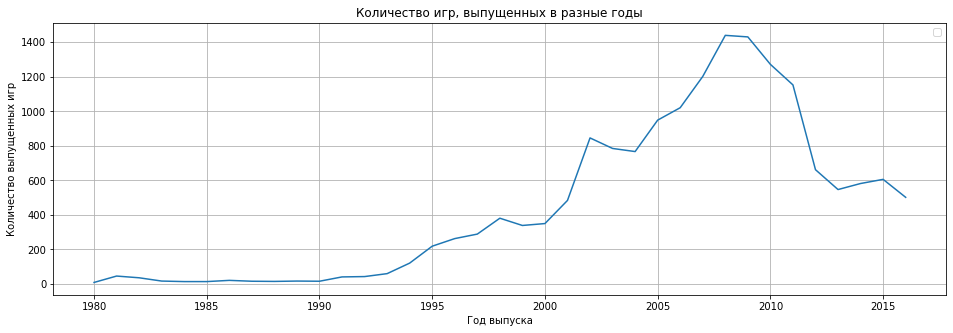

In [17]:
games_on_period = df.query('year_of_release!=0').pivot_table(
    index='year_of_release',
    values='name', 
    aggfunc='count')
plt.figure(figsize=(16,5))
sns.lineplot(data=games_on_period)
plt.title("Количество игр, выпущенных в разные годы")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.grid()
_ = plt.legend('')


__Пик количества игр был в 2008 и 2009 годах, далее следует резкий спад.  
Начиная с 2012 года спад замедлился__ 

### Суммарные продажи по годам:

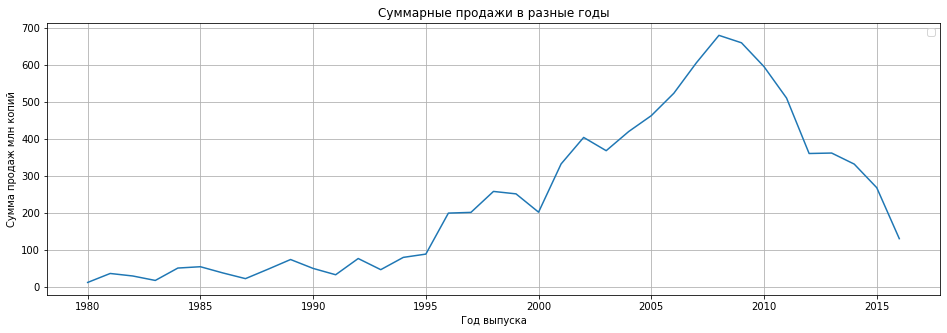

In [18]:
sales_on_period = df.query('year_of_release!=0').pivot_table(
    index='year_of_release',
    values='total_sales', 
    aggfunc='sum')
plt.figure(figsize=(16,5))
sns.lineplot(data=sales_on_period)
plt.title("Суммарные продажи в разные годы")
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж млн копий")
plt.grid()
_ = plt.legend('')


__В отличие от количества игр, суммарная продажа в 2015 и 2016 годах продолжила падение__

### Продажи по платформам за весь период:

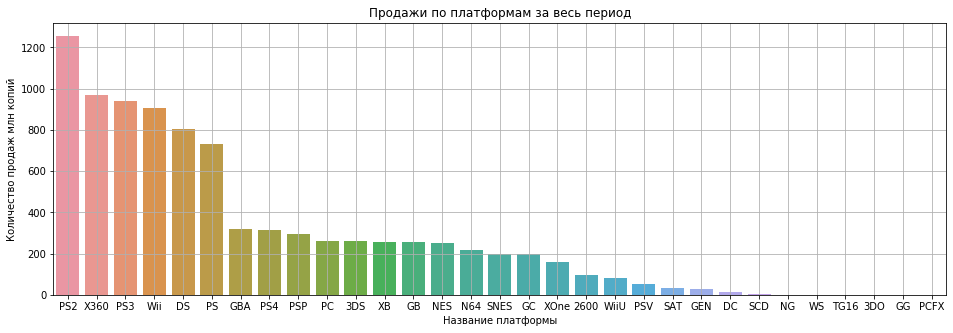

In [19]:
platform_total_sales = df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x=platform_total_sales.index,y=platform_total_sales.total_sales)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.grid()
_ = plt.ylabel("Количество продаж млн копий")

__Самые популярные игровые платформы за весь период это PS2, X360, PS3, Wii, DS, PS__

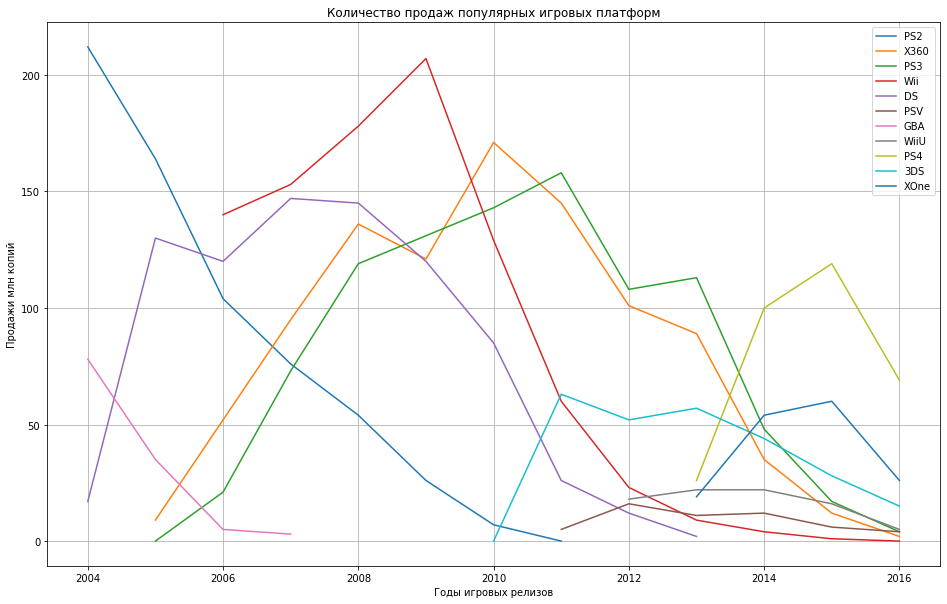

In [20]:
def data(platform):
    res = df.query('@platform==platform and year_of_release > 2003'
                  ).pivot_table(index='year_of_release', 
                                values='total_sales', 
                                aggfunc='sum')
    return res.total_sales.round(0)

plt.figure(figsize=(16,10))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи млн копий')
plt.grid()

sns.lineplot(data=data("PS2"), label="PS2")
sns.lineplot(data=data("X360"), label="X360")
sns.lineplot(data=data("PS3"), label="PS3")
sns.lineplot(data=data("Wii"), label="Wii")
sns.lineplot(data=data("DS"), label="DS")
sns.lineplot(data=data("PSV"), label="PSV")
sns.lineplot(data=data("GBA"), label="GBA")
sns.lineplot(data=data("WiiU"), label="WiiU")
sns.lineplot(data=data("PS4"), label="PS4")
sns.lineplot(data=data("3DS"), label="3DS")
sns.lineplot(data=data("XOne"), label="XOne")
_ = plt.legend()




__Срок жизни платформы составляет 5...10 лет,  
и наблюдается тенденция к его сокращению__

### Продажи по платформам c 2012 года:

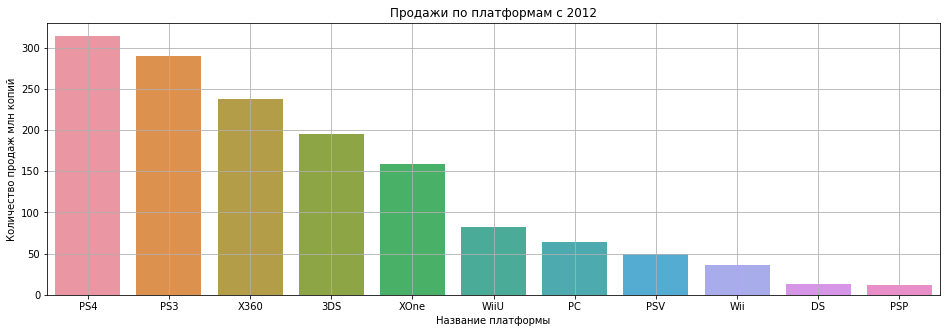

In [21]:
platform_total_sales_from_2012 = df.query('year_of_release>=2012').pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x=platform_total_sales_from_2012.index,y=platform_total_sales_from_2012.total_sales)
plt.title("Продажи по платформам c 2012")
plt.xlabel("Название платформы")
plt.grid()
_ = plt.ylabel("Количество продаж млн копий")

__Самые популярные игровые платформы за период 2012...2016 гг PS4, PS3, X360, 3DS, XOne__

### Продажи по платформам c 2015 года:

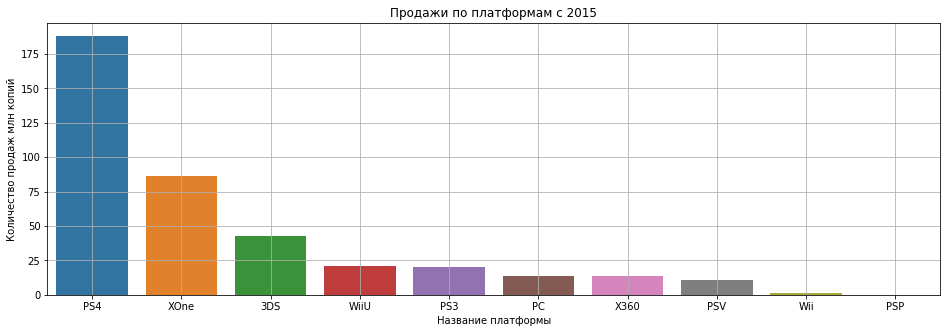

In [22]:
platform_total_sales_from_2015 = df.query('year_of_release>=2015').pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x=platform_total_sales_from_2015.index,y=platform_total_sales_from_2015.total_sales)
plt.title("Продажи по платформам c 2015")
plt.xlabel("Название платформы")
plt.grid()
_ = plt.ylabel("Количество продаж млн копий")

__Наиболее перспективные платформы PS4, XOne, 3DS, WiiU и PS3__

In [23]:
df_actual = df.query('year_of_release>=2012')

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам:

In [24]:
df_actual.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32


In [25]:
list_top5 = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']
df_top5 = df_actual.query('platform in @list_top5 and total_sales<1.5')

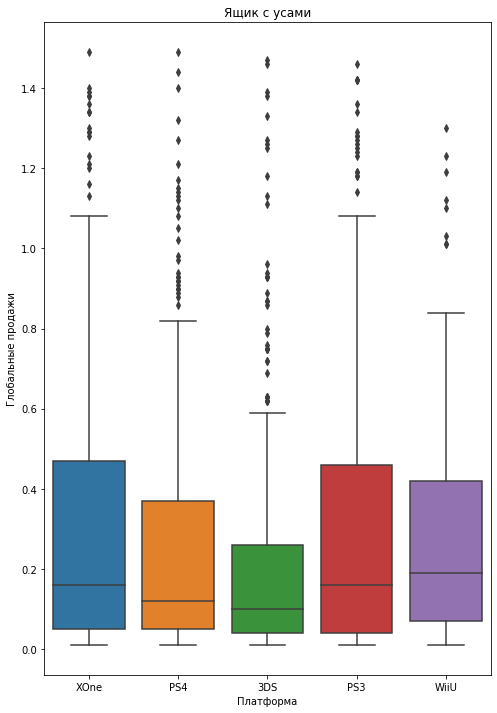

In [26]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df_top5, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
_ = plt.ylabel('Глобальные продажи')

__Распределение продаж имеет смещение вправо, т.е. небольшое количество "хитов" повышает среднее количество продаж__

### Влияние на продажи внутри одной платформы отзывов пользователей и критиков. <br>  Диаграмма рассеяния и корреляция между отзывами и продажами.

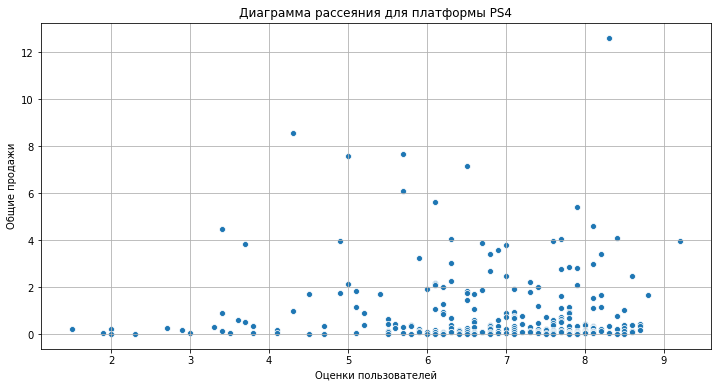

In [27]:
df_PS4 = df_actual.query('platform=="PS4"')
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=df_PS4)
plt.title("Диаграмма рассеяния для платформы PS4")
plt.xlabel("Оценки пользователей")
plt.grid()
_ = plt.ylabel("Общие продажи")

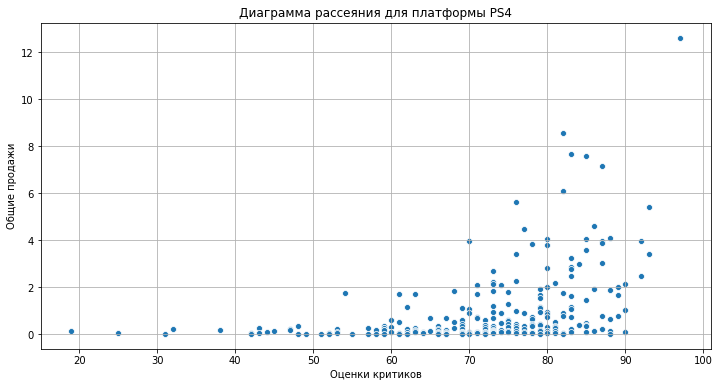

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_PS4)
plt.title("Диаграмма рассеяния для платформы PS4")
plt.xlabel("Оценки критиков")
plt.grid()
_ = plt.ylabel("Общие продажи")

In [29]:
df_PS4[['user_score', 'critic_score', 'total_sales']].corr().round(3)

,user_score,critic_score,total_sales
user_score,1.000,0.558,-0.032
critic_score,0.558,1.000,0.407
total_sales,-0.032,0.407,1.000


__Существует небольшая положительная корреляция между оценками критиков с общими продажами.  
Корреляция между продажами и оценками пользователей ~~еще меньше~~ отсутствует.__

In [30]:
df_actual[['user_score', 'critic_score', 'total_sales']].corr().round(3)

,user_score,critic_score,total_sales
user_score,1.000,0.518,0.005
critic_score,0.518,1.000,0.308
total_sales,0.005,0.308,1.000


### Распределение игр по жанрам:

In [31]:
genres = df.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False)

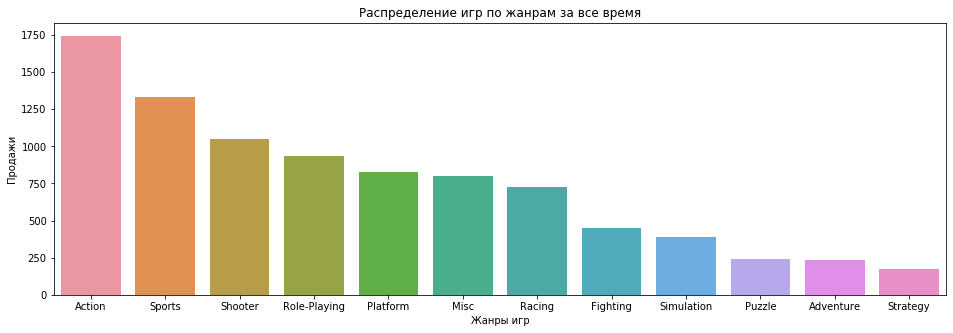

In [32]:
plt.figure(figsize=(16,5))
plt.title('Распределение игр по жанрам за все время')
sns.barplot(data=genres, 
            x=genres.index,
            y='total_sales')
plt.xlabel('Жанры игр')
_ = plt.ylabel('Продажи')

### Распределение игр по жанрам за последние 2 года:

In [33]:
genres = df.query('year_of_release>=2015').pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False)

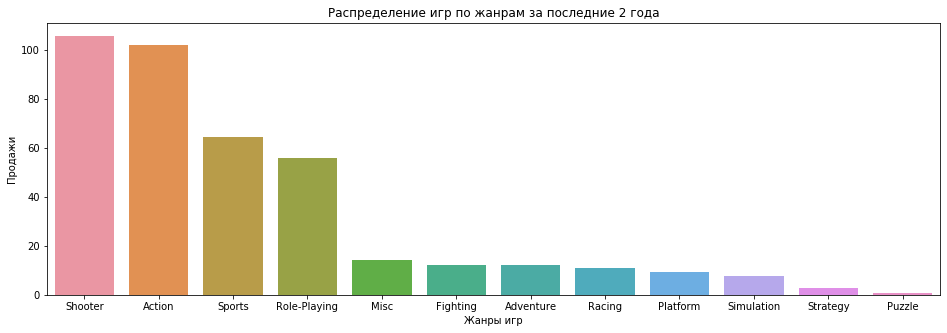

In [34]:
plt.figure(figsize=(16,5))
plt.title('Распределение игр по жанрам за последние 2 года')
sns.barplot(data=genres, 
            x=genres.index,
            y='total_sales')
plt.xlabel('Жанры игр')
_ = plt.ylabel('Продажи')

In [35]:
genres_since_2015_pvt = df.query('year_of_release>=2015').pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc=['count', 'sum', 'mean', 'median'])
genres_since_2015_pvt.columns = ['Количество игр', 'Общие продажи (млн. копий)', 'Средние продажи', 'Медиана продаж']
print('\nСводная таблица жанров в порядке убывания количества продаж:')
genres_since_2015_pvt.round(3).sort_values('Общие продажи (млн. копий)', ascending=False)


Сводная таблица жанров в порядке убывания количества продаж:


,Количество игр,Общие продажи (млн. копий),Средние продажи,Медиана продаж
genre,,,,
Shooter,81,105.73,1.305,0.380
Action,431,102.13,0.237,0.060
Sports,107,64.33,0.601,0.120
Role-Playing,132,55.82,0.423,0.115
Misc,71,14.17,0.200,0.060
Fighting,37,12.37,0.334,0.090
Adventure,110,11.98,0.109,0.030
Racing,42,10.86,0.259,0.055
Platform,28,9.28,0.331,0.100


### Вывод:

```
Наиболее перспективные платформы PS4, XOne, 3DS, WiiU и PS3:
PS4 растет глобально, XOne - рост в основном с Северной Америке, 3DS - рост в Японии
PS3 вытесняется PS4, а X360 вытесняет XOne
Наиболее популярные жанры за все время: Action, Sports, Shooter, Role-PLaying
За последние 2 года наиболее популярны: Shooter, Action, Sports, Role-Playing
- те же категории, но изменился порядок: Shooter вышел на 1 место, сместив Action и Sports
```

## Шаг 4.Портрет пользователя каждого региона:

In [36]:
#Функция для создания сводных таблиц
def pivot_draw(row, title, year=0, specific=False):
    tmp = df.query('year_of_release>=@year')# and rating!="unknown"')
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pvt, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = tmp.pivot_table(
            index=pvt, 
            values=row, 
            aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        if specific: print(ppivot, '\n')
        if year:sns.set_palette("Blues")
        else:   sns.set_palette("Greens")
        sns.barplot(data=ppivot, x=pvt, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)        


### Портрет пользователя из Северной Америки

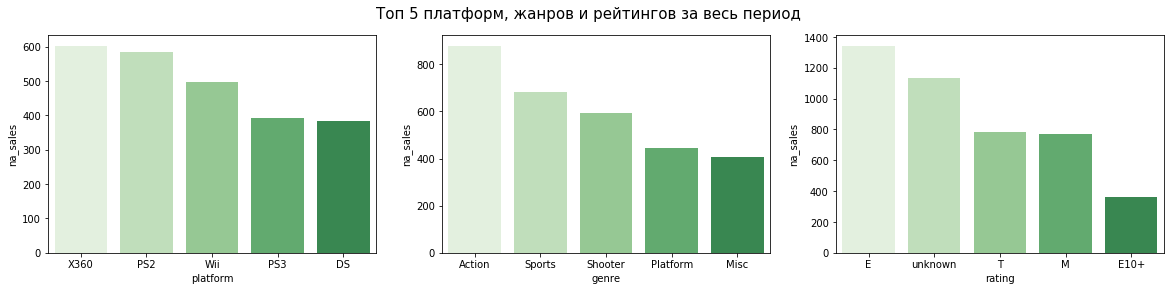

In [37]:
pivot_draw('na_sales', 'Топ 5 платформ, жанров и рейтингов за весь период')

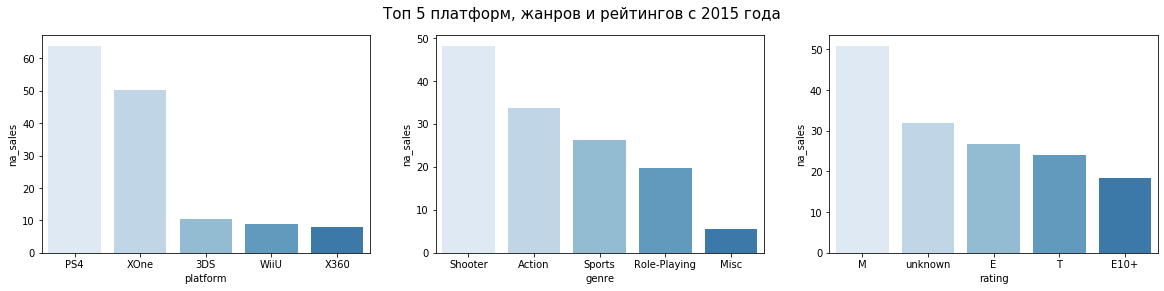

In [38]:
pivot_draw('na_sales','Топ 5 платформ, жанров и рейтингов с 2015 года', 2015)

### Портрет пользователя из Евросоюза

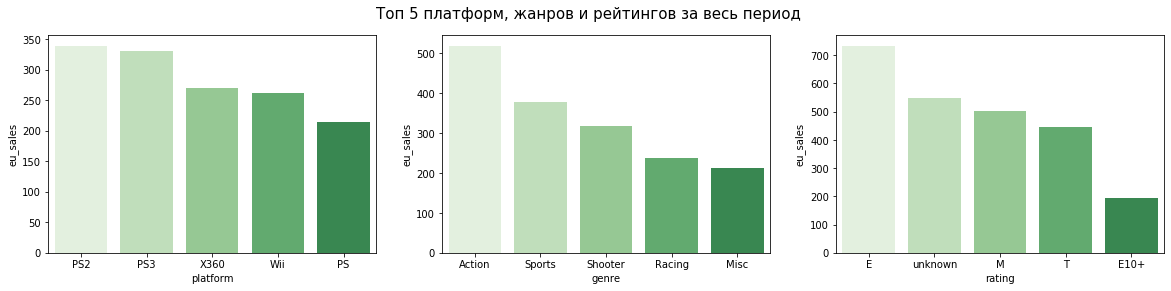

In [39]:
pivot_draw('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период')

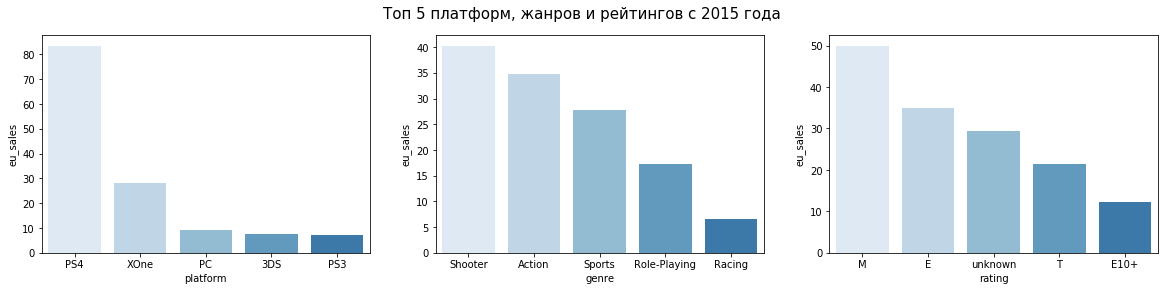

In [40]:
pivot_draw('eu_sales', 'Топ 5 платформ, жанров и рейтингов с 2015 года', 2015)

### Портрет пользователя из Японии 

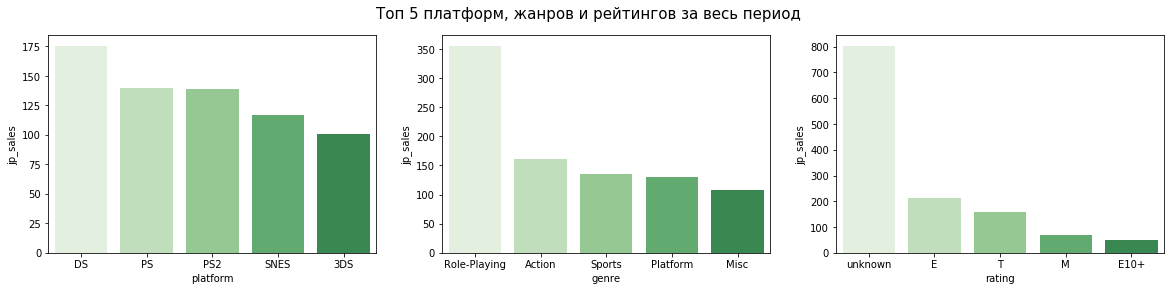

In [41]:
pivot_draw('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

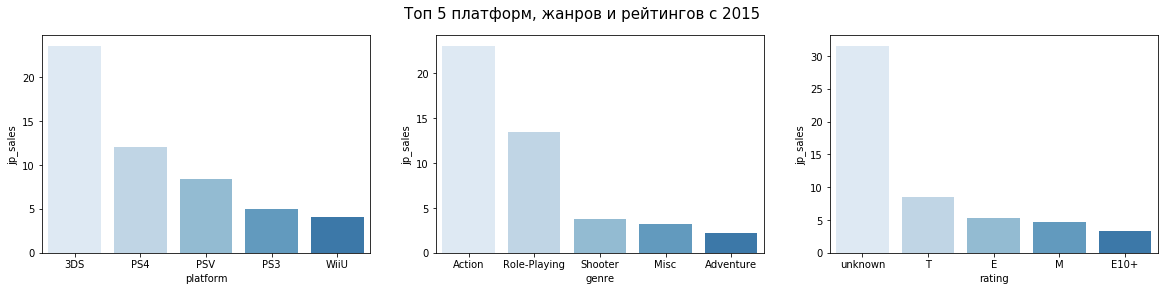

In [42]:
pivot_draw('jp_sales','Топ 5 платформ, жанров и рейтингов с 2015', 2015)

### Вывод:

```
Пользователи из Северной Америки и Евросоюза очень близки по выбору жанров: Shooter, Action, Sports
У пользователи из Японии за последние два года стали популярны Action и Role-Playing.
Пользователи из Японии предпочитают платформы японских производителей: 3DS, PS4, PSV, PS3, WiiU

```

## Шаг 5. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [43]:
XOne = df.query('year_of_release>=2013 and platform=="XOne" and user_score.notna()').user_score
XOne.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [44]:
# ограничим данные с 2013 года, поскольку XOne вышла в этом году
PC = df.query('year_of_release>=2013 and platform=="PC" and user_score.notna()').user_score
PC.describe()

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [45]:
alpha = 0.01

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [46]:
Action = df_actual.query('genre=="Action" and user_score.notna()').user_score
Action.describe()

count    531.000000
mean       6.834275
std        1.371830
min        1.600000
25%        6.250000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [47]:
Sports = df_actual.query(' genre=="Sports" and user_score.notna()').user_score
Sports.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [48]:
alpha = 0.01

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


### Вывод:

```
(нулевую) гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" 
отвергнуть не удалось

(альтернативную) гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"
```

>~~отвергаем~~  
отвергнуть не удалось


<div class="alert alert-block alert-info">
<h2>Общий вывод</h2><br>
<b> Важные параметры для планирования рекламной кампании:</b>
<br><br>    
    
<li> Оценка критиков имеет небольшую положительную корреляцию (около 0.5) с количеством продаж </li>
<li> Пользователи из Северной Америки и Евросоюза предпочитают жанры: Shooter, Action, Sports </li>
<li> У пользователей из Японии наиболее популярны жанры: Action и Role-Playing </li>
<li> Пользователи из Северной Америки и Евросоюза чаще всего используют платформы: PS4 и XOne </li>
<li> Пользователи из Японии предпочитают платформы: 3DS, PS4, PSV </li>
<li> Возрастные рейтинги: наиболее распространенные: "E" и "отсутствует" (можно объединить в одну категорию) </li>
<li> Оставшиеся возрастные категории для Северной Америки и Европы: "M", "T", "E10+" </li>
<li> для Японии: "T", "M", "E10+" </li>
     
</div>
